In [76]:
#I have done this assignment 4 on my own as I was not able to find a team partner for the project. So i completed some tasks of about half the total points 
#Nishant Thakre 
#Roll No =200070051

In [89]:
import cv2
import pywt
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import exposure
from math import log10, sqrt
from scipy.ndimage.filters import gaussian_filter
#importing all the libraries required for different parts of questions
import os
import sys
import random
import tensorflow as tf
from tensorflow import keras

In [90]:
#code for question 1
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
#code for question 1
import glob
path = "/content/drive/MyDrive/610_assignment_4/MoNuSeg-Training-Data/Binary-Mask/*.*"
y_bin_train=[]
for file in glob.glob(path):
   #print(file)
   a= cv2.imread(file,0)
   a=a[:256,:256]
   a.astype(np.float32)
   y_bin_train.append(a)
   #print(a)
y_bin_train=np.array(y_bin_train)
y_bin_train=np.expand_dims(y_bin_train,axis=3)
#refrence : https://stackoverflow.com/questions/51857468/google-colab-how-to-loop-through-images-in-a-folder 

In [183]:
#code for question 1
path = "/content/drive/MyDrive/610_assignment_4/MoNuSeg-Test-Data/Binary-Mask/*.*"
y_bin_test=[]
for file in glob.glob(path):
   #print(file)
   a= cv2.imread(file,0)
   a=a[:256,:256]
   a.astype(np.float32)
   y_bin_test.append(a)
   #print(a)
y_bin_test=np.array(y_bin_test)
y_bin_test=np.expand_dims(y_bin_test,axis=3)

In [184]:
#code for question 1
path = "/content/drive/MyDrive/610_assignment_4/MoNuSeg-Training-Data/Tissue-Images/*.*"
x_tis_train=[]
for file in glob.glob(path):
   #print(file)
   a= cv2.imread(file,0)
   a=a[:256,:256]
   a.astype(np.float32)
   x_tis_train.append(a)
   #print(a)
x_tis_train=np.expand_dims(x_tis_train,axis=3)

In [185]:
#code for question 1
path = "/content/drive/MyDrive/610_assignment_4/MoNuSeg-Test-Data/Tissue-Images/*.*"
x_tis_test=[]
for file in glob.glob(path):
   #print(file)
   a= cv2.imread(file,0)
   a=a[:256,:256]
   a.astype(np.float32)
   x_tis_test.append(a)
   #print(a)
x_tis_test=np.array(x_tis_test)
x_tis_test=np.expand_dims(x_tis_test,axis=3)

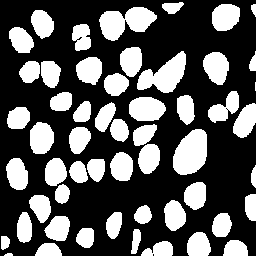

In [186]:

cv2_imshow(y_bin_train[1])

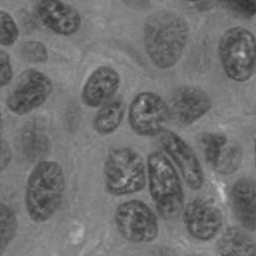

In [187]:
#code for question 1
cv2_imshow(x_tis_train[0])

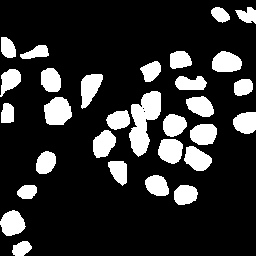

In [188]:
#code for question 1
cv2_imshow(y_bin_test[0])

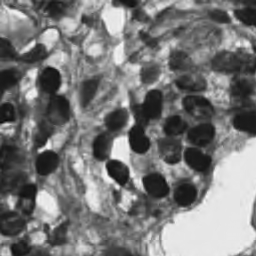

In [189]:
#code for question 1
cv2_imshow(x_tis_test[0])

In [190]:
#code for question 2
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((256,256, 1))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model
#refrence : https://github.com/nikhilroxtomar/UNet-Segmentation-in-Keras-TensorFlow
#the github link was given in the description of the youtube video provided in ms teams for refrence 

In [207]:
#code for question 2
print(x_tis_train.max())
print(x_tis_test.max())
print(np.unique(y_bin_train))
print(np.unique(y_bin_test))
#getting maximum size

255
249
[  0 255]
[  0 255]


In [208]:
#code for question 2
x_tis_train= x_tis_train/255
x_tis_test= x_tis_test/249
# Scaling the masks from 0 to 1
y_bin_train= y_bin_train/255
y_bin_test= y_bin_test/255
# for normalization

In [209]:
#code for question 2
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()
#refrence : https://github.com/nikhilroxtomar/UNet-Segmentation-in-Keras-TensorFlow

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_171 (Conv2D)            (None, 256, 256, 16  160         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_172 (Conv2D)            (None, 256, 256, 16  2320        ['conv2d_171[0][0]']             
                                )                                                           

In [210]:
print(np.shape(x_tis_train))

(24, 256, 256, 1)


In [211]:
print(np.shape(y_bin_train))

(24, 256, 256, 1)


In [212]:
#code for question 3
from sklearn.model_selection import train_test_split
x_tis_train, x_tis_valid, y_bin_train, y_bin_valid = train_test_split(x_tis_train,y_bin_train, test_size=.2, random_state=1234)

In [221]:
#code for question 3
def dice_score(y_bin_test,y_predict,smooth=1e-5):
  #y_predict=y_predict.astype(np.unit8)
  intersection=tf.reduce_sum(y_bin_test*y_predict)
  return (2.*intersection+smooth)/(tf.reduce_sum(tf.square(y_bin_test))+tf.reduce_sum(tf.square(y_predict))+smooth)
def dice_loss(y_bin_test,y_predict):
  return 1-dice_score(y_bin_test,y_predict)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss=dice_loss,metrics=['accuracy',dice_score])
#refrence https://github.com/keras-team/keras/issues/3611

In [222]:
#code for question 3
#fitting the model
a=model.fit(x_tis_train,y_bin_train,batch_size=1,verbose=1,epochs=30,validation_data=(x_tis_valid,y_bin_valid),shuffle=False)

Epoch 1/30
19/19 [==============================] - 22s 1s/step - loss: 0.4770 - accuracy: 0.5874 - dice_score: 0.5230 - val_loss: 0.5321 - val_accuracy: 0.4515 - val_dice_score: 0.4679
Epoch 2/30
19/19 [==============================] - 17s 917ms/step - loss: 0.4767 - accuracy: 0.6075 - dice_score: 0.5233 - val_loss: 0.5322 - val_accuracy: 0.4530 - val_dice_score: 0.4678
Epoch 3/30
19/19 [==============================] - 17s 918ms/step - loss: 0.4765 - accuracy: 0.6086 - dice_score: 0.5235 - val_loss: 0.5323 - val_accuracy: 0.4522 - val_dice_score: 0.4677
Epoch 4/30
19/19 [==============================] - 19s 1s/step - loss: 0.4764 - accuracy: 0.6084 - dice_score: 0.5236 - val_loss: 0.5324 - val_accuracy: 0.4516 - val_dice_score: 0.4676
Epoch 5/30
19/19 [==============================] - 17s 922ms/step - loss: 0.4762 - accuracy: 0.6082 - dice_score: 0.5238 - val_loss: 0.5324 - val_accuracy: 0.4512 - val_dice_score: 0.4676
Epoch 6/30
19/19 [==============================] - 17s 912ms

(1, 256, 256, 1)
1/1 [==============================] - 1s 806ms/step
(256, 256)


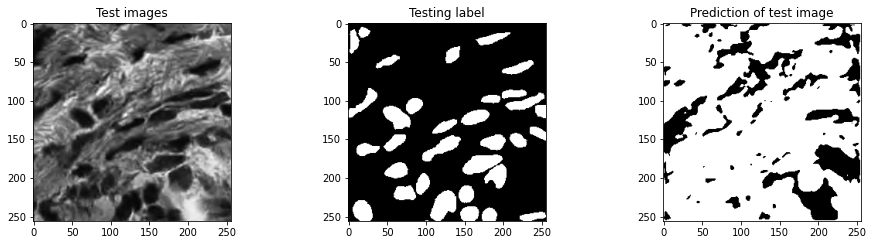

(1, 256, 256, 1)
1/1 [==============================] - 0s 291ms/step
(256, 256)


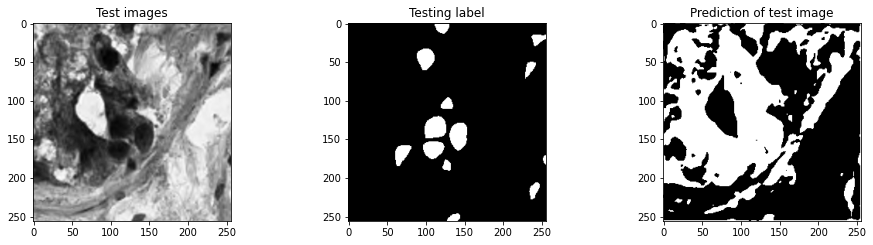

(1, 256, 256, 1)
1/1 [==============================] - 0s 220ms/step
(256, 256)


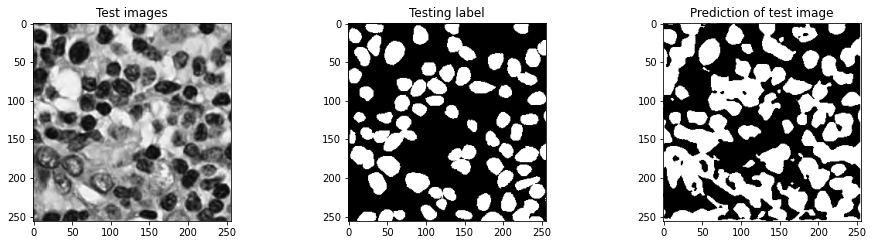

(1, 256, 256, 1)
1/1 [==============================] - 0s 209ms/step
(256, 256)


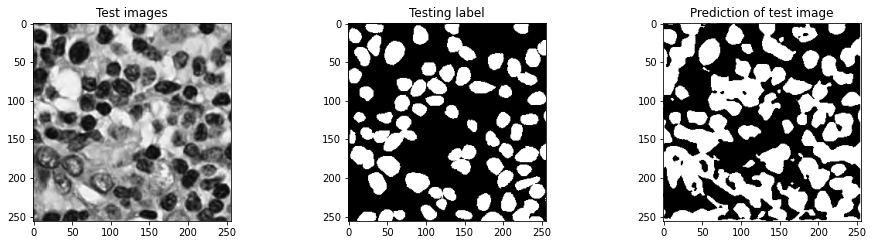

(1, 256, 256, 1)
1/1 [==============================] - 0s 224ms/step
(256, 256)


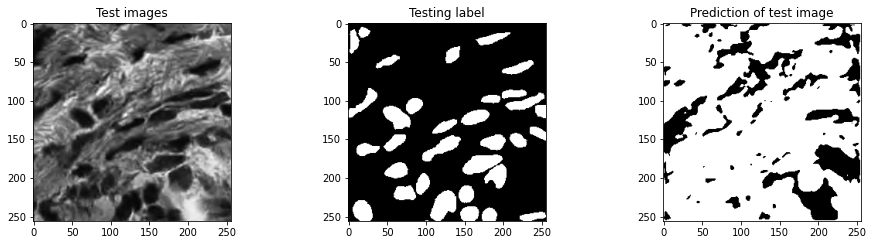

In [224]:
#code for question 4
threshold=0.5
test_number=np.random.randint(0,13) #genrates random no
test_img=x_tis_test[test_number] #gets test image at serial no = that random no
original=y_bin_test[test_number] #oringal y image mask
input_img_test=np.expand_dims(test_img,0) 
print(input_img_test.shape)
predict=(model.predict(input_img_test)[0,:,:,0]>threshold).astype(np.uint8) #predicted mask and converts float32 to uint8 if value goes above threshold
print(predict.shape)

plt.figure(figsize=(16,8)) #figure size
plt.subplot(231)
plt.title('Test images') 
plt.imshow(test_img[:,:,0],cmap='gray')
plt.subplot(232)
plt.title('Testing label')
plt.imshow(original[:,:,0],cmap='gray')
plt.subplot(233)
plt.title('Prediction of test image')
plt.imshow(predict,cmap='gray')
plt.show()

threshold=0.5
test_number=np.random.randint(0,13)
test_img=x_tis_test[test_number]
original=y_bin_test[test_number]
input_img_test=np.expand_dims(test_img,0)
print(input_img_test.shape)
predict=(model.predict(input_img_test)[0,:,:,0]>threshold).astype(np.uint8)
print(predict.shape)

plt.figure(figsize=(16,8))
plt.subplot(231)
plt.title('Test images')
plt.imshow(test_img[:,:,0],cmap='gray')
plt.subplot(232)
plt.title('Testing label')
plt.imshow(original[:,:,0],cmap='gray')
plt.subplot(233)
plt.title('Prediction of test image')
plt.imshow(predict,cmap='gray')
plt.show()

threshold=0.5
test_number=np.random.randint(0,13)
test_img=x_tis_test[test_number]
original=y_bin_test[test_number]
input_img_test=np.expand_dims(test_img,0)
print(input_img_test.shape)
predict=(model.predict(input_img_test)[0,:,:,0]>threshold).astype(np.uint8)
print(predict.shape)

plt.figure(figsize=(16,8)) #figure size
plt.subplot(231)
plt.title('Test images')
plt.imshow(test_img[:,:,0],cmap='gray')
plt.subplot(232)
plt.title('Testing label')
plt.imshow(original[:,:,0],cmap='gray')
plt.subplot(233)
plt.title('Prediction of test image')
plt.imshow(predict,cmap='gray')
plt.show()

threshold=0.5
test_number=np.random.randint(0,13)
test_img=x_tis_test[test_number]
original=y_bin_test[test_number]
input_img_test=np.expand_dims(test_img,0)
print(input_img_test.shape)
predict=(model.predict(input_img_test)[0,:,:,0]>threshold).astype(np.uint8)
print(predict.shape)

plt.figure(figsize=(16,8))
plt.subplot(231)
plt.title('Test images')
plt.imshow(test_img[:,:,0],cmap='gray')
plt.subplot(232)
plt.title('Testing label')
plt.imshow(original[:,:,0],cmap='gray')
plt.subplot(233)
plt.title('Prediction of test image')
plt.imshow(predict,cmap='gray')
plt.show()

threshold=0.5
test_number=np.random.randint(0,13)
test_img=x_tis_test[test_number]
original=y_bin_test[test_number]
input_img_test=np.expand_dims(test_img,0)
print(input_img_test.shape)
predict=(model.predict(input_img_test)[0,:,:,0]>threshold).astype(np.uint8)
print(predict.shape)

plt.figure(figsize=(16,8))
plt.subplot(231)
plt.title('Test images')
plt.imshow(test_img[:,:,0],cmap='gray')
plt.subplot(232)
plt.title('Testing label')
plt.imshow(original[:,:,0],cmap='gray')
plt.subplot(233)
plt.title('Prediction of test image')
plt.imshow(predict,cmap='gray')
plt.show()